For validation purposes, in this notebook I reproduce the most relevant figures in the steady VLM chapter of "Low Speed Aerodynamics", 2nd Edition by Katz & Plotkin.

In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from fun_lib import *

# FIGURE 12.21
For this figure, AR = 4 does not correspond to the planform, it's the "real" wingspan, so we need to project onto the plane with cos(delta)

In [2]:
deltas = np.array([-45,-30,-15,0,15,30])*np.pi/180
m, n = 8,30
T = 0*np.pi/180
c_r, c_t = 1,1
U_i = 100
rho = 1.0
dt = 0.1
alpha = 1*np.pi/180

In [3]:
CLa_list = list()
for delta in deltas:
    bp = 4*np.cos(delta)
    X,PC = wing_panels(bp,T,delta,c_r,c_t, m, n)
    XV = steady_wing_vortex_panels(X,alpha)
    CLw,_,_ = aerodynamic_steady_distributions(X,XV,PC,U_i,alpha,rho)
    CLa_list.append(CLw/alpha*np.cos(delta))

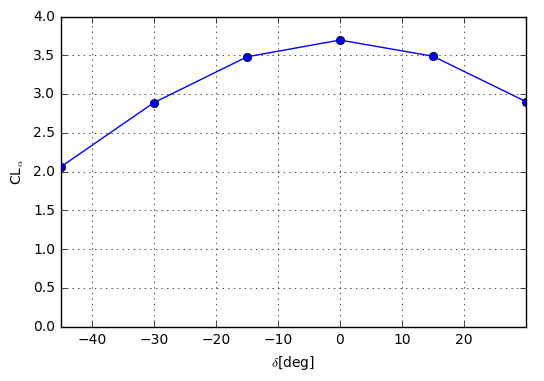

In [4]:
plt.plot(deltas*180/np.pi,CLa_list,'o-')
plt.xlabel(r'$\delta$[deg]')
plt.ylabel(r'CL$_\alpha$')
plt.ylim(0,4)
plt.grid()
plt.xlim(deltas.min()*180/np.pi,deltas.max()*180/np.pi);

# Figure 12.19

In [5]:
bp = 7.28
c_ts = np.array([0.4,0.6,1])
m, n = 15,80
delta = 0*np.pi/180
T = 0*np.pi/180
c_r = 1
U_i = 100
rho = 1.0
dt = 0.1
alpha = 1*np.pi/180

In [6]:
cl_span_list = list()
for c_t in c_ts:
    X,PC = wing_panels(bp,T,delta,c_r,c_t,m,n)
    XV = steady_wing_vortex_panels(X,alpha)
    CLw,_,cl_span = aerodynamic_steady_distributions(X,XV,PC,U_i,alpha,rho)
    cl_span_list.append(cl_span/CLw)

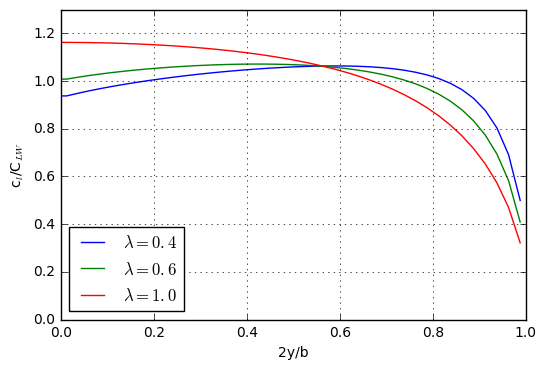

In [7]:
plt.plot(PC[[0,0,0],:,1].T*2/bp,np.array(cl_span_list).T)
plt.legend([r'$\lambda=0.4$',r'$\lambda=0.6$',r'$\lambda=1.0$'],loc='best')
plt.xlabel('2y/b')
plt.ylabel(r'c$_l$/C$_{LW}$')
plt.xlim(0,1)
plt.ylim(0,1.3)
plt.grid();

# Figure 12.17

In [8]:
bp = 4
m, n = 15,60
delta = 0*np.pi/180
thetas = np.array([0,45,135])*np.pi/180
c_r, c_t= 1, 1
U_i = 100
rho = 1.0
dt = 0.1
alpha = 1*np.pi/180

In [9]:
cl_span_list = list()
for T in thetas:
    X,PC = wing_panels(bp,T,delta,c_r,c_t,m,n)
    XV = steady_wing_vortex_panels(X,alpha)
    CLw,_,cl_span = aerodynamic_steady_distributions(X,XV,PC,U_i,alpha,rho)
    cl_span_list.append(cl_span/CLw)

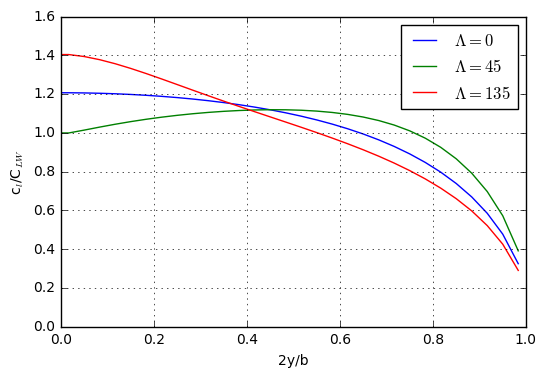

In [10]:
plt.plot(PC[[0,0,0],:,1].T*2/bp,np.array(cl_span_list).T)
plt.legend([r'$\Lambda=0$',r'$\Lambda=45$',r'$\Lambda=135$'],loc='best')
plt.xlabel('2y/b')
plt.ylabel(r'c$_l$/C$_{LW}$')
plt.xlim(0,1)
plt.ylim(0,1.6)
plt.grid();

# Figure 12.16

In [11]:
bps = np.linspace(0.5,7,num=20)
thetas = np.array([0,30,45,60])*np.pi/180
m, n = 8,30
delta = 0*np.pi/180
c_r, c_t= 1, 1
U_i = 100
rho = 1.0
dt = 0.1
alpha = 1*np.pi/180

In [12]:
CLa = list()
for T in thetas:
    for bp in bps:
        X,PC = wing_panels(bp,T,delta,c_r,c_t,m,n)
        XV = steady_wing_vortex_panels(X,alpha)
        CLw,_,_ = aerodynamic_steady_distributions(X,XV,PC,U_i,alpha,rho)
        CLa.append(CLw/alpha)

In [13]:
CLa = np.array(CLa).reshape(thetas.size,bps.size)

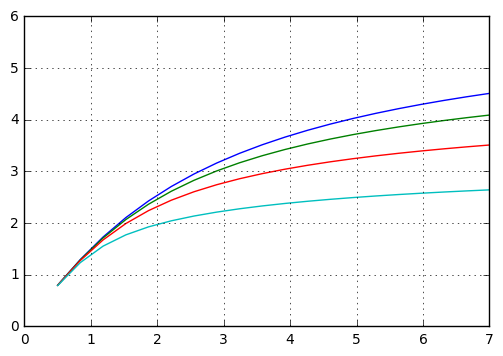

In [14]:
for i in range(thetas.size):
    plt.plot(bps,CLa[i,:])
plt.grid()
plt.ylim(0,6);